In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

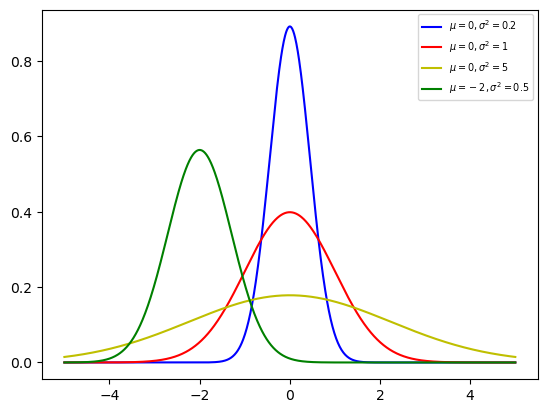

In [5]:
x = np.linspace(-5.0, 5.0, 1000)


mu_sig = [[0,0.2,'b'],[0,1,'r'],[0,5,'y'],[-2,0.5,'g']]


for i in mu_sig:
    mu = i[0]
    sig = i[1]
    sigma = np.sqrt(sig)
    colour = i[2]
    plt.plot(
        x,
        1/(sigma * (2*np.pi)**.5) * np.e ** (-(x-mu)**2/(2 * sigma**2)), 
        color=colour, 
        label=f'$\mu = {mu},\sigma^2 = {sig}$')


plt.legend(loc='best', fontsize='x-small')
plt.show();

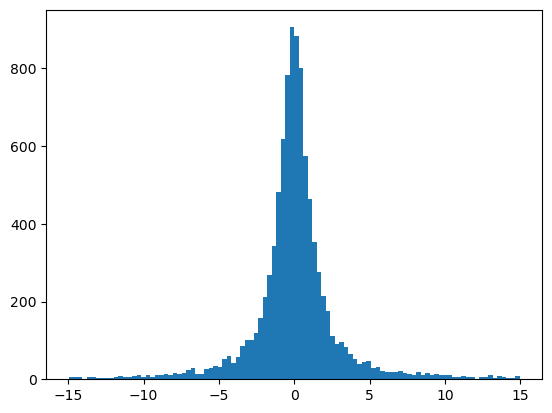

In [6]:
cau = np.random.standard_cauchy(size=10000)
cau = cau[(cau>-15) & (cau<15)]
plt.hist(cau, bins=100)
plt.show()

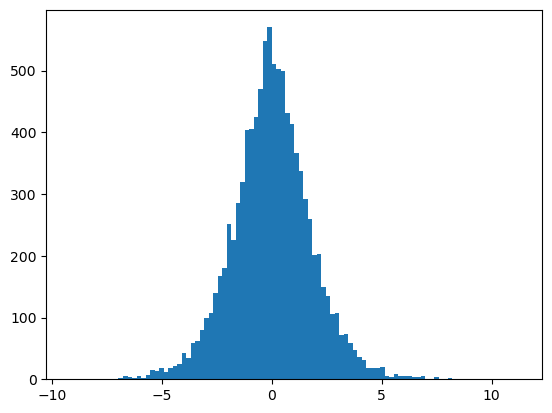

In [7]:
log = np.random.logistic(loc=0, scale=1, size=10000)
plt.hist(log, bins=100)
plt.show()

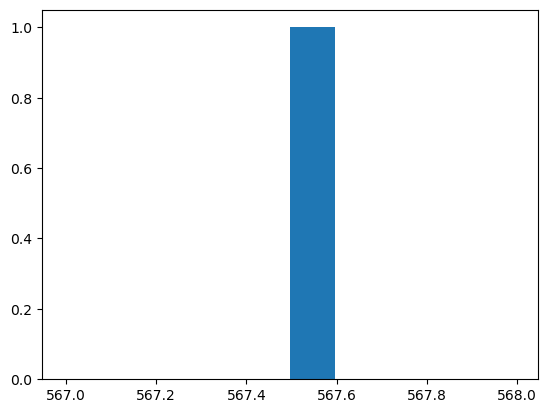

In [8]:
rng = np.random.default_rng()
vals = rng.triangular(left=-1000, mode=650, right=1000)
plt.hist(vals)
plt.show()